# Importing Libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [122]:
train = pd.read_csv('titanic_train.csv')

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data

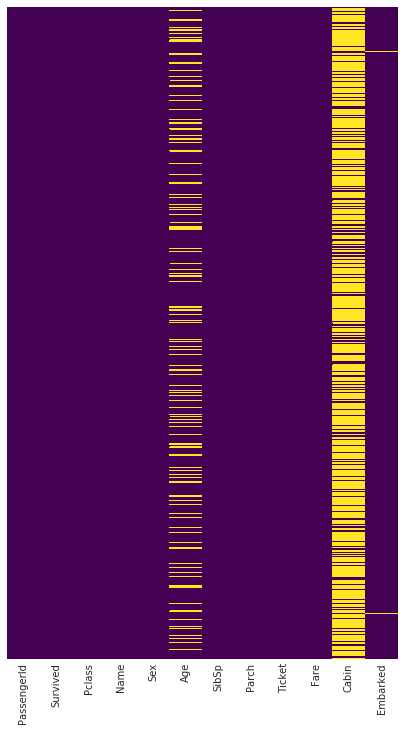

In [124]:
plt.figure(figsize=(7,12))
sns.heatmap(train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

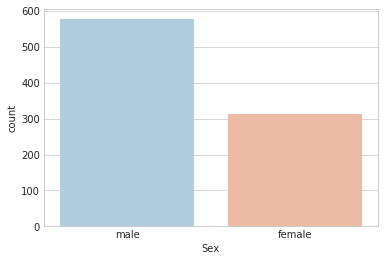

In [125]:
sns.countplot(data=train,x='Sex',palette='RdBu_r')

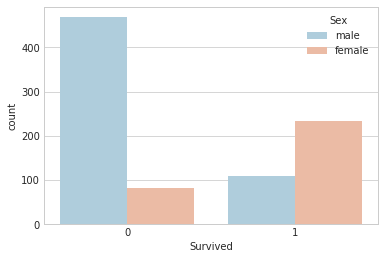

In [126]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

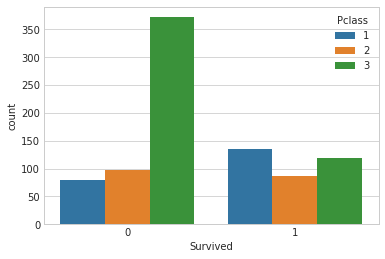

In [127]:
sns.countplot(data=train,x='Survived',hue='Pclass')

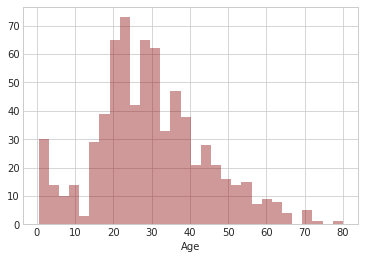

In [128]:
sns.distplot(train['Age'].dropna(),kde=False,color='DarkRed',bins=30)

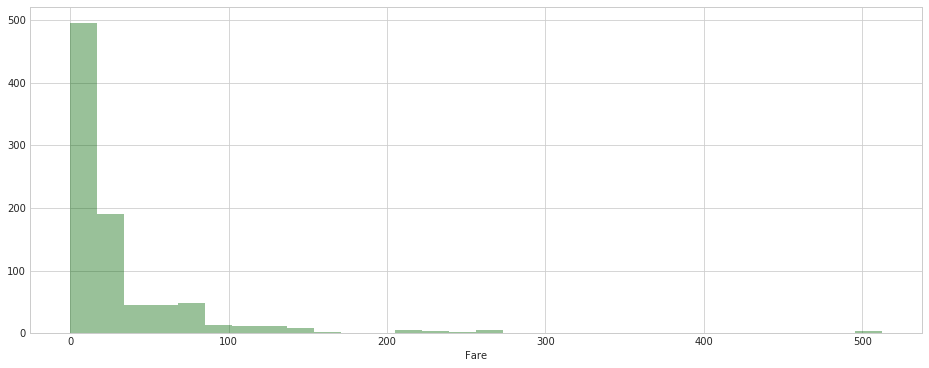

In [129]:
plt.figure(figsize=(16,6))
sns.distplot(train['Fare'],kde=False,bins=30,color='DarkGreen')

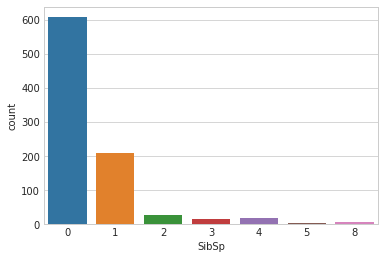

In [130]:
sns.countplot(train['SibSp'])

# Data Cleaning

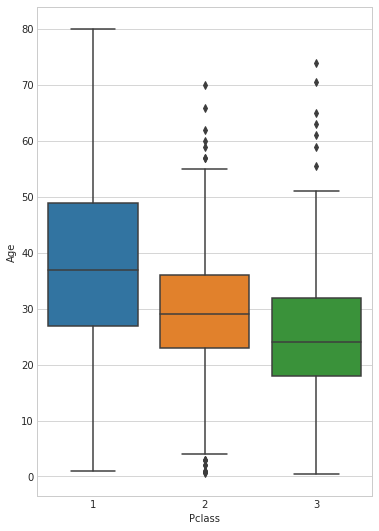

In [131]:
plt.figure(figsize=(6,9))
sns.boxplot(x='Pclass',y='Age',data=train)

In [132]:
def imputation(cols):
    pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
    
    
    
train['Age'] = train[['Pclass','Age']].apply(imputation,axis=1)

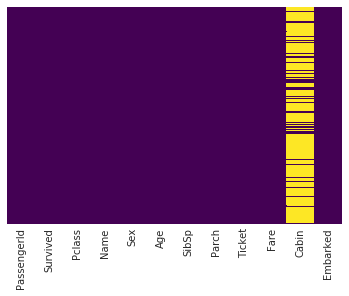

In [133]:
sns.heatmap(data=train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [134]:
train.drop(axis=1,labels='Cabin',inplace=True)

In [135]:
train[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [136]:
train.dropna(inplace=True)

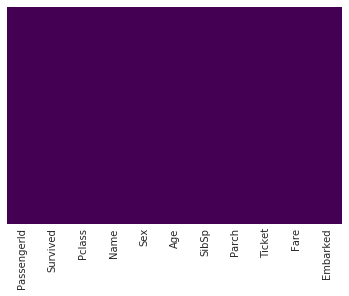

In [137]:
sns.heatmap(data=train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [138]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features to Numeric Values

In [140]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [142]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [143]:
train = pd.concat([train,sex,embarked],axis=1)

In [144]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [145]:
train.drop(['Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [146]:
train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.25,1,0,1


# Building a Logistic Regression Model

## Train Test Split

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

## Creating and Training model

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
lm = LogisticRegression()

In [151]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
predictions = lm.predict(X_test)

## Evaluation

In [158]:
from sklearn.metrics import classification_report

In [159]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
print(confusion_matrix(y_test,predictions))

[[151  12]
 [ 36  68]]
